## AVALIANDO O MELHOR MODELO DE REGRESSÃO

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
imoveis = pd.read_csv('Valorizacao_Ambiental.csv', sep=';')

In [4]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [5]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Ordem     172 non-null    int64
 1   Valor     172 non-null    int64
 2   Area      172 non-null    int64
 3   IA        172 non-null    int64
 4   Andar     172 non-null    int64
 5   Suites    172 non-null    int64
 6   Vista     172 non-null    int64
 7   DistBM    172 non-null    int64
 8   Semruido  172 non-null    int64
 9   AV100m    172 non-null    int64
dtypes: int64(10)
memory usage: 13.6 KB


In [6]:
imoveis.isnull()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
167,False,False,False,False,False,False,False,False,False,False
168,False,False,False,False,False,False,False,False,False,False
169,False,False,False,False,False,False,False,False,False,False
170,False,False,False,False,False,False,False,False,False,False


In [7]:
imoveis.shape

(172, 10)

In [8]:
imoveis.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [9]:
imoveis.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


Identificando a variavel target

Text(0.5, 1.0, 'Histograma da variavel valor')

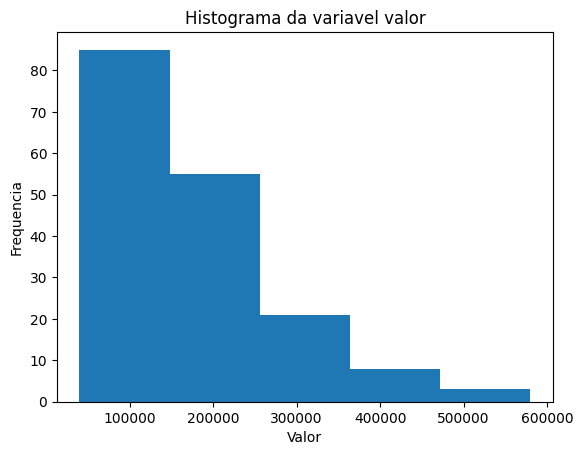

In [10]:
plt.hist(imoveis["Valor"], bins=5)

plt.ylabel("Frequencia")
plt.xlabel("Valor")

plt.title("Histograma da variavel valor")

In [11]:
imoveis["raiz_valor"] = np.sqrt(imoveis["Valor"])

In [12]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


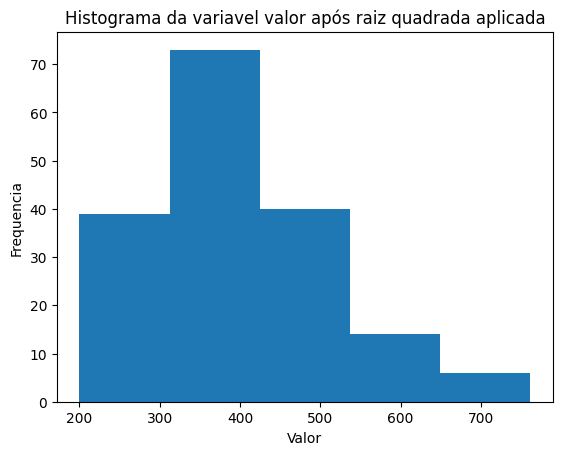

In [13]:
plt.hist(imoveis["raiz_valor"], bins=5)

plt.ylabel("Frequencia")
plt.xlabel("Valor")

plt.title("Histograma da variavel valor após raiz quadrada aplicada")
plt.show()

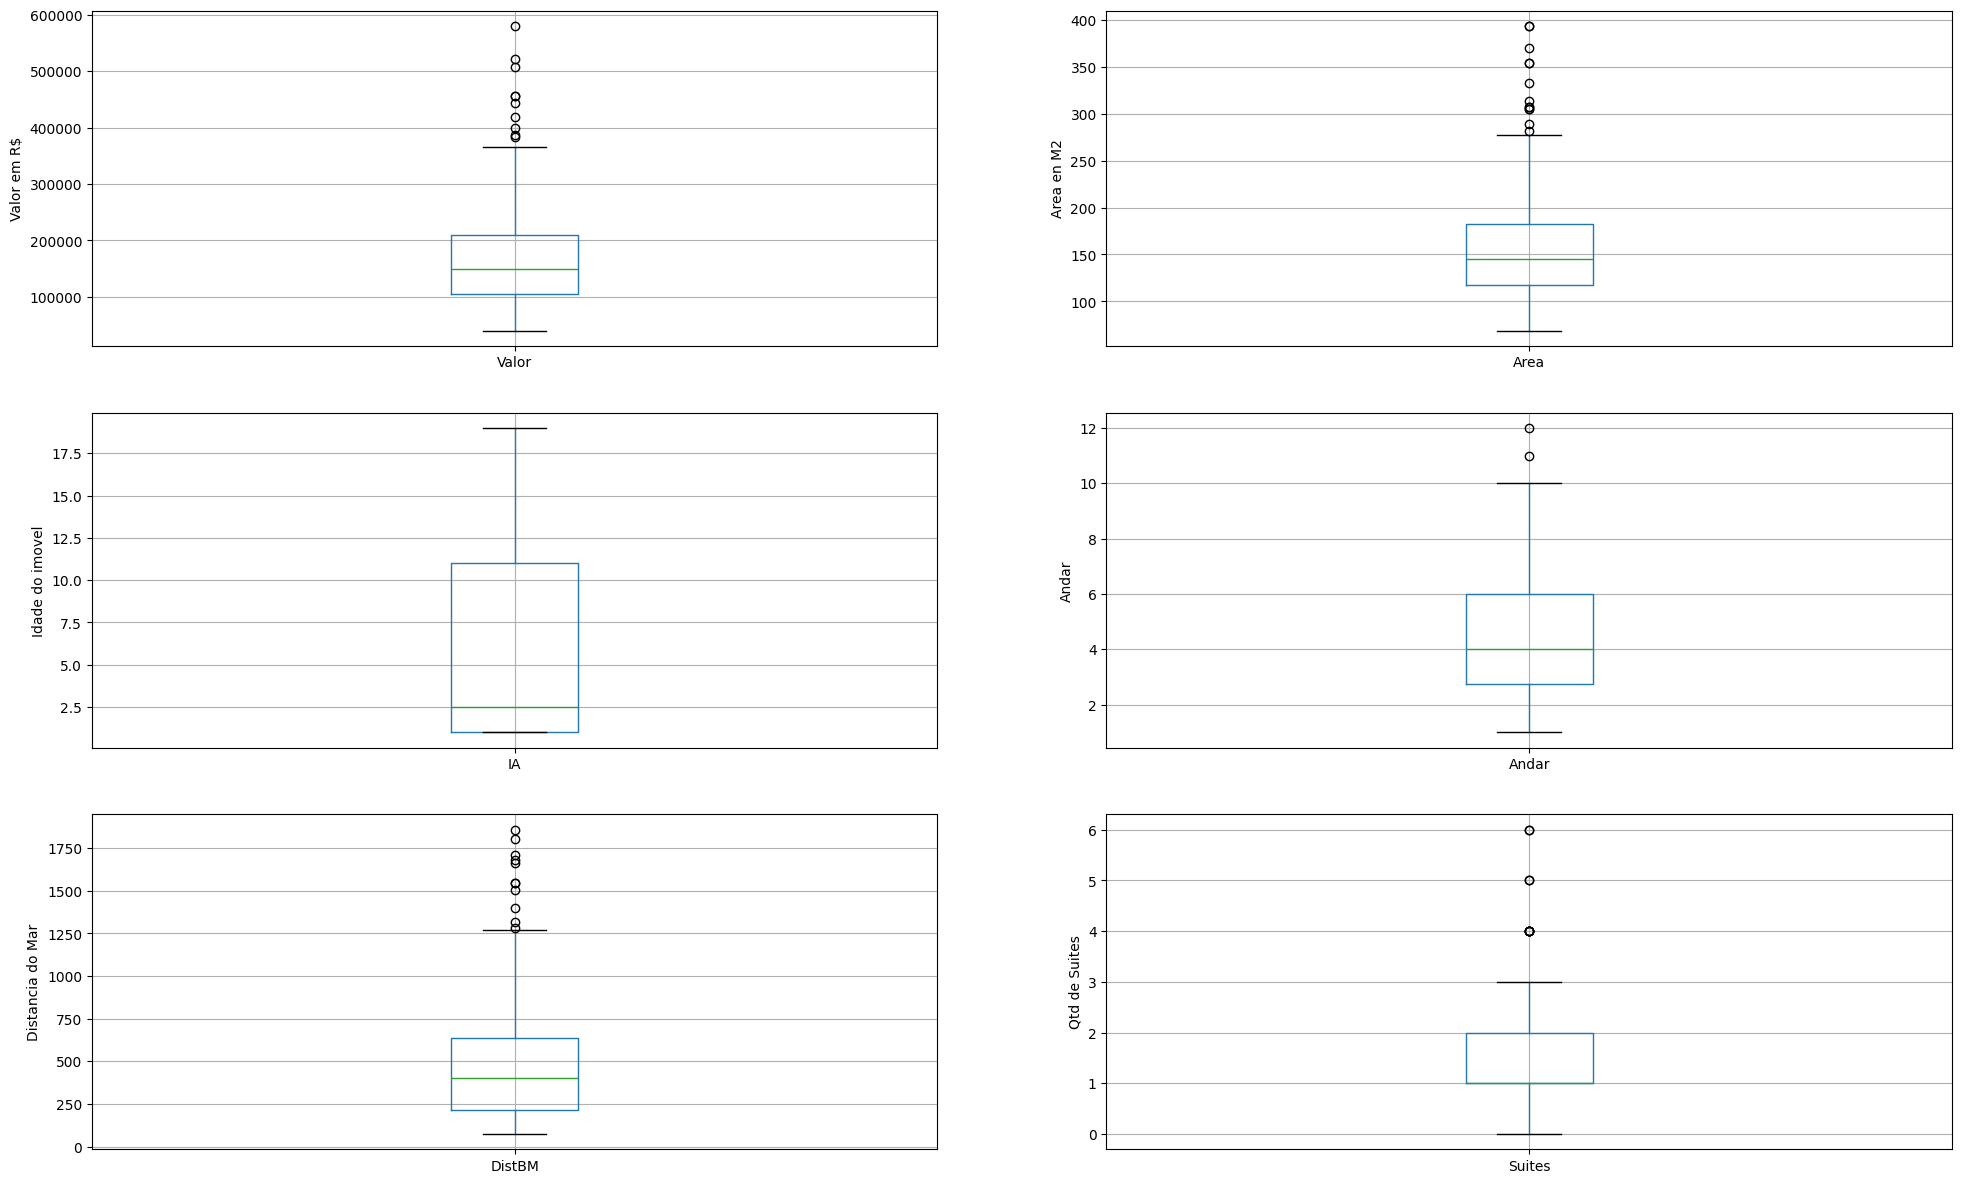

In [14]:
plt.figure(figsize=(24,20))
plt.subplot(4,2,1)
fig = imoveis.boxplot(column= "Valor")
fig.set_title('')
fig.set_ylabel('Valor em R$')

plt.subplot(4,2,2)
fig = imoveis.boxplot(column= "Area")
fig.set_title('')
fig.set_ylabel('Area en M2')

plt.subplot(4,2,3)
fig = imoveis.boxplot(column= "IA")
fig.set_title('')
fig.set_ylabel('Idade do imovel')

plt.subplot(4,2,4)
fig = imoveis.boxplot(column= "Andar")
fig.set_title('')
fig.set_ylabel('Andar')

plt.subplot(4,2,5)
fig = imoveis.boxplot(column= "DistBM")
fig.set_title('')
fig.set_ylabel('Distancia do Mar')

plt.subplot(4,2,6)
fig = imoveis.boxplot(column= "Suites")
fig.set_title('')
fig.set_ylabel('Qtd de Suites')


plt.show()



<Axes: >

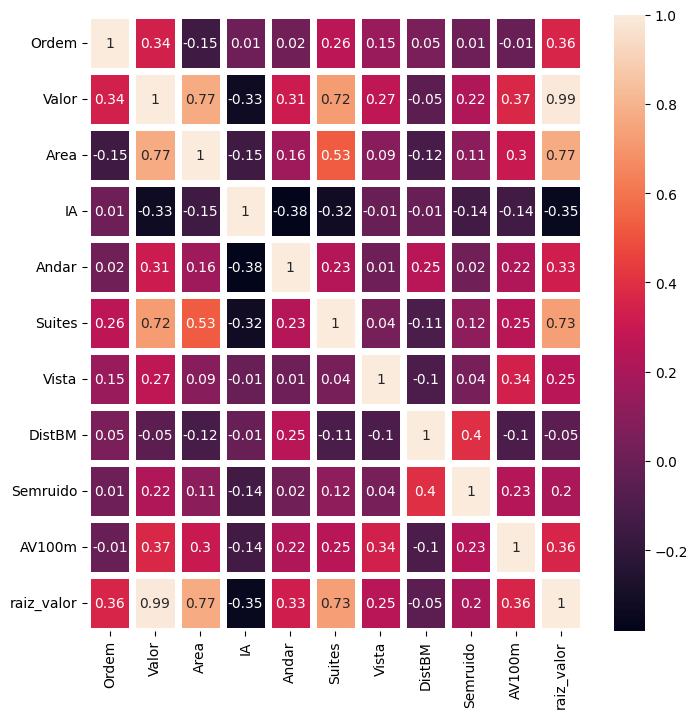

In [15]:
correlation_matrix = imoveis.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))

sb.heatmap(data=correlation_matrix, annot=True, linewidths=5, ax=ax)



Text(0.5, 1.0, 'Area deo imóvel x valor')

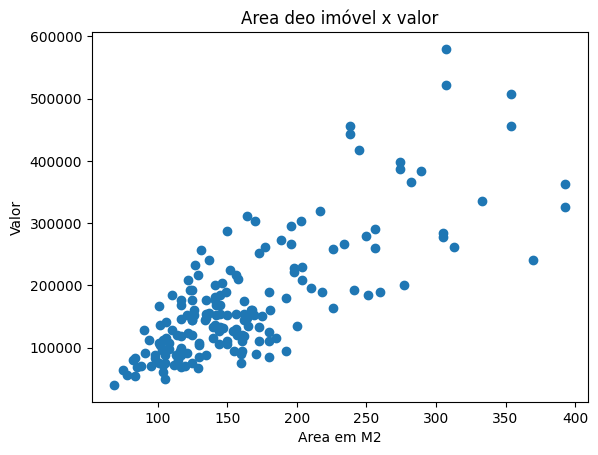

In [16]:
plt.scatter("Area", "Valor", data=imoveis)
plt.xlabel("Area em M2")
plt.ylabel("Valor")
plt.title("Area deo imóvel x valor")

Text(0.5, 1.0, 'Idade do imovel x valor')

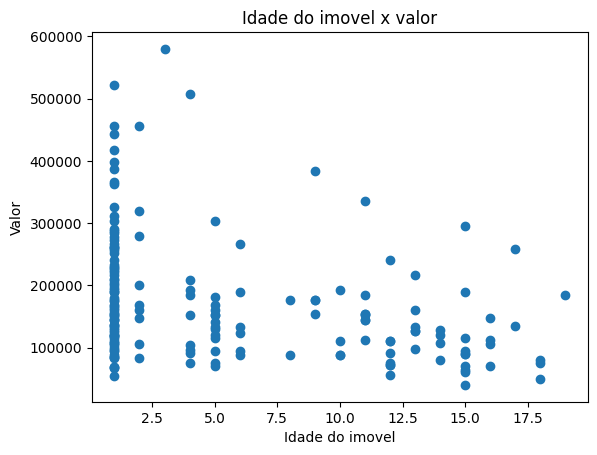

In [17]:
plt.scatter("IA", "Valor", data=imoveis)
plt.xlabel("Idade do imovel")
plt.ylabel("Valor")
plt.title("Idade do imovel x valor")

In [18]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


C:\Users\Will\AppData\Local\Temp\ipykernel_25500\1210935063.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="Vista",y="Valor", data=imoveis, palette="hls")


<Axes: xlabel='Vista', ylabel='Valor'>

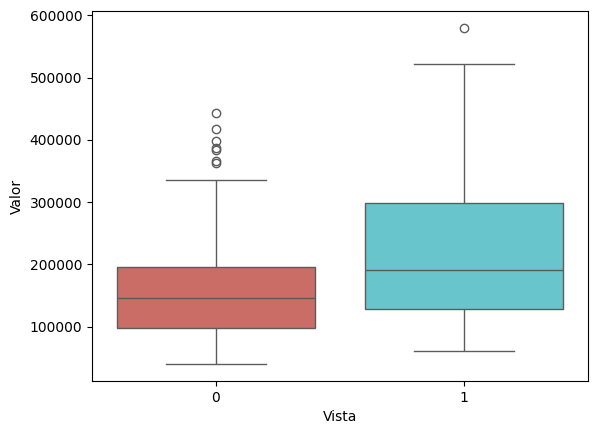

In [19]:
sb.boxplot(x="Vista",y="Valor", data=imoveis, palette="hls")

C:\Users\Will\AppData\Local\Temp\ipykernel_25500\432502570.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="Semruido",y="Valor", data=imoveis, palette="hls")


<Axes: xlabel='Semruido', ylabel='Valor'>

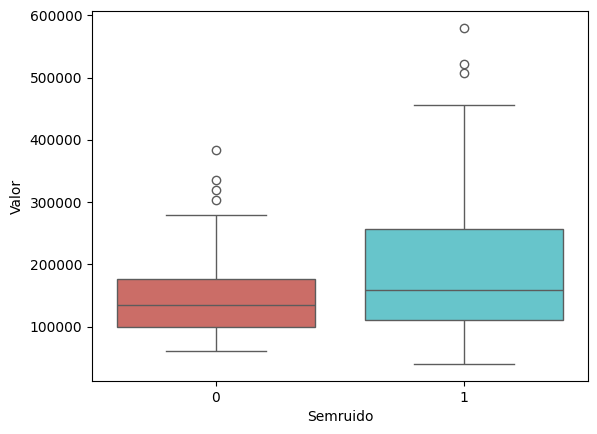

In [20]:
sb.boxplot(x="Semruido",y="Valor", data=imoveis, palette="hls")

<Axes: xlabel='AV100m', ylabel='Valor'>

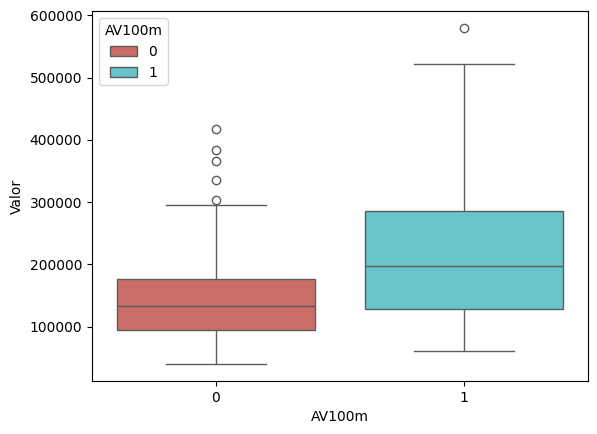

In [21]:
sb.boxplot(x="AV100m",y="Valor", data=imoveis, palette="hls", hue='AV100m')